# Two Sigma News Exploratory Data Analysis
### By: George

In [ ]:
from kaggle.competitions import twosigmanews
# You can only call make_env() once, so don't lose it!
# env = twosigmanews.make_env()

In [ ]:
# Get market and news data from environment
(market_train_df, news_train_df) = env.get_training_data()

In [ ]:
print(market_train_df.shape,news_train_df.shape)

In [ ]:
market_train_df.head()

In [ ]:
market_train_df.tail()

# Market Data Analysis

In [ ]:
print(len(set(market_train_df['time'])))
print(len(set(market_train_df['assetCode'])))
print(len(set(market_train_df['assetName'])))

In [ ]:
print(len(set(market_train_df['assetCode'][market_train_df['assetName']=='Unknown'])))

In [ ]:
print(len(set(zip(market_train_df['assetCode'],market_train_df['assetName']))))

In [ ]:
NameList = market_train_df['assetName']
NameCount = {}
for name in NameList:
    NameCount[name] = NameCount.get(name,0)+1

comp1 = lambda x:(x[1],x[0])
for key, value in sorted(NameCount.items(), key=comp1,reverse = True):
    print("%s: %s" % (key, value))

In [ ]:
assetPair = zip(market_train_df['assetName'],market_train_df['assetCode'])
assetMap = {}
for pair in assetPair:
    if pair[1] not in assetMap.get(pair[0],[]):
        assetMap[pair[0]] = assetMap.get(pair[0],[])+[pair[1]]
        
comp2 = lambda x:len(x[1])
for key, value in sorted(assetMap.items(), key=comp2,reverse = True):
    print("%s: %s" % (key, value))

In [ ]:
firstTime = market_train_df['time'][0]
print(firstTime)

In [ ]:
print(firstTime.hour,firstTime.minute,firstTime.second)

In [ ]:
for timestamp in set(market_train_df['time']):
    if timestamp.hour!=22 or timestamp.minute!=0 or timestamp.second!=0:
        print('Error!')
        break
# if there is no 'Error', it means all timestamp are at 22:00:00+00:00
# so they are all EOD information

In [ ]:
set(market_train_df['universe']) # 1 means tradeable on that day

In [ ]:
# Stock split
# AAPL's 4th split took place on June 09, 2014. 
# This was a 7 for 1 split, meaning for each share of AAPL owned pre-split, the shareholder now owned 7 shares. 
# For example, a 8000 share position pre-split, became a 56000 share position following the split.
apple_close = []
apple_open = []
for pair in zip(market_train_df['assetName'],market_train_df['close'],market_train_df['open']):
    if pair[0] == 'Apple Inc':
        apple_close.append(pair[1])

import matplotlib.pyplot as plt
plt.plot(apple_close)
plt.show()

In [ ]:
#returnsClosePrevRaw1	returnsOpenPrevRaw1	returnsClosePrevMktres1	returnsOpenPrevMktres1	
#returnsClosePrevRaw10	returnsOpenPrevRaw10	returnsClosePrevMktres10	returnsOpenPrevMktres10	
#returnsOpenNextMktres10
import numpy as np
from scipy.stats import *

def market_summary_by_name( name ):
    name_market = market_train_df[market_train_df['assetName'] == name ].iloc[10:,6:15]
    tradeable = market_train_df['universe']
    '''
    print('Mean')
    print(name_market.aggregate(np.mean,0))
    print('Std')
    print(name_market.aggregate(np.std,0))
    print('Skewness')
    print(name_market.aggregate(skew,0))
    print('Kurtosis')
    print(name_market.aggregate(kurtosis,0))
    print('Tradeable percentage:',np.mean(tradeable))
    '''
    return [name_market.aggregate(np.mean,0),\
            name_market.aggregate(np.std,0),\
            name_market.aggregate(skew,0),\
            name_market.aggregate(kurtosis,0),\
            np.mean(tradeable)]

In [ ]:
market_summary_by_name('Apple Inc')

In [ ]:
type(market_summary_by_name('Apple Inc')[0])

In [199]:
import pandas as pd
def market_summary_all():
    Mean_merged = None
    Std_merged  = None
    Skew_merged = None
    Kurt_merged = None
    count = 0
    for name in set(market_train_df['assetName']):
        if name!='Unknown':
            count += 1
            print('Processing name',count)
            name_result = market_summary_by_name( name )
            Mean_merged = pd.concat([Mean_merged,name_result[0].to_frame()],1) if (Mean_merged is not None) else name_result[0].to_frame()
            Std_merged  = pd.concat([Std_merged,name_result[1].to_frame()],1)  if (Std_merged is not None)  else name_result[1].to_frame()
    Mean_df = pd.DataFrame(Mean_merged.transpose()).dropna()
    Std_df  = pd.DataFrame(Std_merged.transpose()).dropna()
    return [[Mean_df.aggregate(np.median),Mean_df.aggregate(min),Mean_df.aggregate(max)],\
            [Std_df.aggregate(np.median), Std_df.aggregate(min), Std_df.aggregate(max)]]

In [200]:
summary_result = market_summary_all()

Processing name 1
Processing name 2
Processing name 3
Processing name 4
Processing name 5
Processing name 6
Processing name 7
Processing name 8
Processing name 9
Processing name 10
Processing name 11
Processing name 12
Processing name 13
Processing name 14
Processing name 15
Processing name 16
Processing name 17
Processing name 18
Processing name 19
Processing name 20
Processing name 21
Processing name 22
Processing name 23
Processing name 24
Processing name 25
Processing name 26
Processing name 27
Processing name 28
Processing name 29
Processing name 30
Processing name 31
Processing name 32
Processing name 33
Processing name 34
Processing name 35
Processing name 36
Processing name 37
Processing name 38
Processing name 39
Processing name 40
Processing name 41
Processing name 42
Processing name 43
Processing name 44
Processing name 45
Processing name 46
Processing name 47
Processing name 48
Processing name 49
Processing name 50
Processing name 51
Processing name 52
Processing name 53
Pr

Processing name 421
Processing name 422
Processing name 423
Processing name 424
Processing name 425
Processing name 426
Processing name 427
Processing name 428
Processing name 429
Processing name 430
Processing name 431
Processing name 432
Processing name 433
Processing name 434
Processing name 435
Processing name 436
Processing name 437
Processing name 438
Processing name 439
Processing name 440
Processing name 441
Processing name 442
Processing name 443
Processing name 444
Processing name 445
Processing name 446
Processing name 447
Processing name 448
Processing name 449
Processing name 450
Processing name 451
Processing name 452
Processing name 453
Processing name 454
Processing name 455
Processing name 456
Processing name 457
Processing name 458
Processing name 459
Processing name 460
Processing name 461
Processing name 462
Processing name 463
Processing name 464
Processing name 465
Processing name 466
Processing name 467
Processing name 468
Processing name 469
Processing name 470


Processing name 831
Processing name 832
Processing name 833
Processing name 834
Processing name 835
Processing name 836
Processing name 837
Processing name 838
Processing name 839
Processing name 840
Processing name 841
Processing name 842
Processing name 843
Processing name 844
Processing name 845
Processing name 846
Processing name 847
Processing name 848
Processing name 849
Processing name 850
Processing name 851
Processing name 852
Processing name 853
Processing name 854
Processing name 855
Processing name 856
Processing name 857
Processing name 858
Processing name 859
Processing name 860
Processing name 861
Processing name 862
Processing name 863
Processing name 864
Processing name 865
Processing name 866
Processing name 867
Processing name 868
Processing name 869
Processing name 870
Processing name 871
Processing name 872
Processing name 873
Processing name 874
Processing name 875
Processing name 876
Processing name 877
Processing name 878
Processing name 879
Processing name 880


Processing name 1231
Processing name 1232
Processing name 1233
Processing name 1234
Processing name 1235
Processing name 1236
Processing name 1237
Processing name 1238
Processing name 1239
Processing name 1240
Processing name 1241
Processing name 1242
Processing name 1243
Processing name 1244
Processing name 1245
Processing name 1246
Processing name 1247
Processing name 1248
Processing name 1249
Processing name 1250
Processing name 1251
Processing name 1252
Processing name 1253
Processing name 1254
Processing name 1255
Processing name 1256
Processing name 1257
Processing name 1258
Processing name 1259
Processing name 1260
Processing name 1261
Processing name 1262
Processing name 1263
Processing name 1264
Processing name 1265
Processing name 1266
Processing name 1267
Processing name 1268
Processing name 1269
Processing name 1270
Processing name 1271
Processing name 1272
Processing name 1273
Processing name 1274
Processing name 1275
Processing name 1276
Processing name 1277
Processing na

Processing name 1626
Processing name 1627
Processing name 1628
Processing name 1629
Processing name 1630
Processing name 1631
Processing name 1632
Processing name 1633
Processing name 1634
Processing name 1635
Processing name 1636
Processing name 1637
Processing name 1638
Processing name 1639
Processing name 1640
Processing name 1641
Processing name 1642
Processing name 1643
Processing name 1644
Processing name 1645
Processing name 1646
Processing name 1647
Processing name 1648
Processing name 1649
Processing name 1650
Processing name 1651
Processing name 1652
Processing name 1653
Processing name 1654
Processing name 1655
Processing name 1656
Processing name 1657
Processing name 1658
Processing name 1659
Processing name 1660
Processing name 1661
Processing name 1662
Processing name 1663
Processing name 1664
Processing name 1665
Processing name 1666
Processing name 1667
Processing name 1668
Processing name 1669
Processing name 1670
Processing name 1671
Processing name 1672
Processing na

Processing name 2017
Processing name 2018
Processing name 2019
Processing name 2020
Processing name 2021
Processing name 2022
Processing name 2023
Processing name 2024
Processing name 2025
Processing name 2026
Processing name 2027
Processing name 2028
Processing name 2029
Processing name 2030
Processing name 2031
Processing name 2032
Processing name 2033
Processing name 2034
Processing name 2035
Processing name 2036
Processing name 2037
Processing name 2038
Processing name 2039
Processing name 2040
Processing name 2041
Processing name 2042
Processing name 2043
Processing name 2044
Processing name 2045
Processing name 2046
Processing name 2047
Processing name 2048
Processing name 2049
Processing name 2050
Processing name 2051
Processing name 2052
Processing name 2053
Processing name 2054
Processing name 2055
Processing name 2056
Processing name 2057
Processing name 2058
Processing name 2059
Processing name 2060
Processing name 2061
Processing name 2062
Processing name 2063
Processing na

Processing name 2408
Processing name 2409
Processing name 2410
Processing name 2411
Processing name 2412
Processing name 2413
Processing name 2414
Processing name 2415
Processing name 2416
Processing name 2417
Processing name 2418
Processing name 2419
Processing name 2420
Processing name 2421
Processing name 2422
Processing name 2423
Processing name 2424
Processing name 2425
Processing name 2426
Processing name 2427
Processing name 2428
Processing name 2429
Processing name 2430
Processing name 2431
Processing name 2432
Processing name 2433
Processing name 2434
Processing name 2435
Processing name 2436
Processing name 2437
Processing name 2438
Processing name 2439
Processing name 2440
Processing name 2441
Processing name 2442
Processing name 2443
Processing name 2444
Processing name 2445
Processing name 2446
Processing name 2447
Processing name 2448
Processing name 2449
Processing name 2450
Processing name 2451
Processing name 2452
Processing name 2453
Processing name 2454
Processing na

Processing name 2803
Processing name 2804
Processing name 2805
Processing name 2806
Processing name 2807
Processing name 2808
Processing name 2809
Processing name 2810
Processing name 2811
Processing name 2812
Processing name 2813
Processing name 2814
Processing name 2815
Processing name 2816
Processing name 2817
Processing name 2818
Processing name 2819
Processing name 2820
Processing name 2821
Processing name 2822
Processing name 2823
Processing name 2824
Processing name 2825
Processing name 2826
Processing name 2827
Processing name 2828
Processing name 2829
Processing name 2830
Processing name 2831
Processing name 2832
Processing name 2833
Processing name 2834
Processing name 2835
Processing name 2836
Processing name 2837
Processing name 2838
Processing name 2839
Processing name 2840
Processing name 2841
Processing name 2842
Processing name 2843
Processing name 2844
Processing name 2845
Processing name 2846
Processing name 2847
Processing name 2848
Processing name 2849
Processing na

Processing name 3198
Processing name 3199
Processing name 3200
Processing name 3201
Processing name 3202
Processing name 3203
Processing name 3204
Processing name 3205
Processing name 3206
Processing name 3207
Processing name 3208
Processing name 3209
Processing name 3210
Processing name 3211
Processing name 3212
Processing name 3213
Processing name 3214
Processing name 3215
Processing name 3216
Processing name 3217
Processing name 3218
Processing name 3219
Processing name 3220
Processing name 3221
Processing name 3222
Processing name 3223
Processing name 3224
Processing name 3225
Processing name 3226
Processing name 3227
Processing name 3228
Processing name 3229
Processing name 3230
Processing name 3231
Processing name 3232
Processing name 3233
Processing name 3234
Processing name 3235
Processing name 3236
Processing name 3237
Processing name 3238
Processing name 3239
Processing name 3240
Processing name 3241
Processing name 3242
Processing name 3243
Processing name 3244
Processing na

In [198]:
pd.DataFrame(summary_result.transpose()).dropna().aggregate(np.median)

returnsClosePrevRaw1        0.000528
returnsOpenPrevRaw1         0.000535
returnsClosePrevMktres1     0.000165
returnsOpenPrevMktres1      0.000249
returnsClosePrevRaw10       0.004981
returnsOpenPrevRaw10        0.005075
returnsClosePrevMktres10    0.001610
returnsOpenPrevMktres10     0.001997
returnsOpenNextMktres10     0.001820
dtype: float64

In [201]:
summary_result

[[returnsClosePrevRaw1        0.000528
  returnsOpenPrevRaw1         0.000535
  returnsClosePrevMktres1     0.000165
  returnsOpenPrevMktres1      0.000249
  returnsClosePrevRaw10       0.004981
  returnsOpenPrevRaw10        0.005075
  returnsClosePrevMktres10    0.001610
  returnsOpenPrevMktres10     0.001997
  returnsOpenNextMktres10     0.001820
  dtype: float64, returnsClosePrevRaw1       -0.212644
  returnsOpenPrevRaw1        -0.173571
  returnsClosePrevMktres1    -0.164873
  returnsOpenPrevMktres1     -0.173831
  returnsClosePrevRaw10      -0.375436
  returnsOpenPrevRaw10       -0.319412
  returnsClosePrevMktres10   -0.286554
  returnsOpenPrevMktres10    -2.221988
  returnsOpenNextMktres10    -2.202348
  dtype: float64, returnsClosePrevRaw1         0.066181
  returnsOpenPrevRaw1          8.520701
  returnsClosePrevMktres1      0.068673
  returnsOpenPrevMktres1       4.948884
  returnsClosePrevRaw10        0.611070
  returnsOpenPrevRaw10         9.205749
  returnsClosePrevMktres10

# News Data Analysis

In [208]:
news_train_df.head()

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,bodySize,companyCount,headlineTag,marketCommentary,sentenceCount,wordCount,assetCodes,assetName,firstMentionSentence,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCount,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3,1,RTRS,"{'ENR', 'ASIA', 'CN', 'NGS', 'EMRG', 'RTRS', '...","{'Z', 'O', 'OIL'}",1438,1,,False,11,275,"{'0857.HK', '0857.F', '0857.DE', 'PTR.N'}",PetroChina Co Ltd,6,0.235702,-1,0.500739,0.419327,0.079934,73,0,0,0,0,0,0,0,3,6,7
1,2007-01-01 07:03:35+00:00,2007-01-01 07:03:34+00:00,2007-01-01 07:03:34+00:00,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3,1,RTRS,"{'FEA', 'CA', 'LATAM', 'MX', 'INS', 'ASIA', 'I...","{'PGE', 'PCO', 'G', 'ESN', 'MD', 'PCU', 'DNP',...",4413,1,FEATURE,False,55,907,{'STA.N'},Travelers Companies Inc,8,0.447214,-1,0.600082,0.345853,0.054064,62,1,1,1,1,1,1,1,3,3,3
2,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,1cefd27a40fabdfe,PRESS DIGEST - Wall Street Journal - Jan 1,3,1,RTRS,"{'RET', 'ENR', 'ID', 'BG', 'US', 'PRESS', 'IQ'...","{'T', 'DNP', 'PSC', 'U', 'D', 'M', 'RNP', 'PTD...",2108,2,PRESS DIGEST,False,15,388,"{'WMT.DE', 'WMT.N'}",Wal-Mart Stores Inc,14,0.377964,-1,0.450049,0.295671,0.254280,67,0,0,0,0,0,0,0,5,11,17
3,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'B...","{'T', 'DNP', 'PSC', 'U', 'D', 'M', 'RNP', 'PTD...",1776,6,PRESS DIGEST,False,14,325,"{'GOOG.O', 'GOOG.OQ', 'GOOGa.DE'}",Google Inc,13,0.149071,-1,0.752917,0.162715,0.084368,83,0,0,0,0,0,0,0,5,13,15
4,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'B...","{'T', 'DNP', 'PSC', 'U', 'D', 'M', 'RNP', 'PTD...",1776,6,PRESS DIGEST,False,14,325,{'XMSR.O'},XM Satellite Radio Holdings Inc,11,0.149071,-1,0.699274,0.209360,0.091366,102,0,0,0,0,0,0,0,0,0,0


In [209]:
news_train_df.tail()

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,bodySize,companyCount,headlineTag,marketCommentary,sentenceCount,wordCount,assetCodes,assetName,firstMentionSentence,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCount,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
9328745,2016-12-30 21:56:06+00:00,2016-12-30 21:56:06+00:00,2016-12-30 21:56:06+00:00,fc80724160cc7bf4,"INTREXON - ON DEC 30, CO, THIRD SECURITY EXECU...",1,1,RTRS,"{'BLR', 'HECA', 'PHMR', 'MRCH', 'US', 'RTRS', ...","{'E', 'U'}",0,1,,False,1,35,{'XON.N'},Intrexon Corp,1,1.0,1,0.115706,0.410445,0.473849,35,0,0,0,0,0,0,1,10,10,10
9328746,2016-12-30 21:56:28+00:00,2016-12-30 21:56:28+00:00,2016-12-30 21:56:06+00:00,2e3e5407e186dd51,INTREXON CORP - AMENDMENT EXTENDS TERM OF SERV...,1,2,RTRS,"{'BLR', 'DBT', 'HECA', 'PHMR', 'MRCH', 'BACT',...","{'E', 'U'}",0,1,,False,1,20,{'XON.N'},Intrexon Corp,1,1.0,1,0.032272,0.122635,0.845093,20,0,0,1,1,1,1,2,11,11,11
9328747,2016-12-30 21:57:00+00:00,2016-12-30 21:57:00+00:00,2016-12-30 21:57:00+00:00,cef1bb88f92ca104,EQUITY ALERT: Rosen Law Firm Announces Investi...,3,1,BSW,"{'CMSS', 'CLJ', 'GEN', 'NEWR', 'HECA', 'PHMR',...","{'BSW', 'CNR'}",3734,1,,False,16,664,"{'SGEN.O', 'SGEN.OQ'}",Seattle Genetics Inc,1,1.0,-1,0.651900,0.227707,0.120393,360,0,0,3,4,4,1,2,18,41,41
9328748,2016-12-30 21:58:53+00:00,2016-12-30 21:58:53+00:00,2016-12-30 21:58:53+00:00,c26c3df1804571a6,PROFESSIONAL DIVERSITY NETWORK INC - FILES FOR...,1,1,RTRS,"{'BLR', 'SWIT', 'ITSE', 'SISU', 'BACT', 'TMT',...","{'E', 'U'}",0,1,,False,1,23,"{'IPDN.O', 'IPDN.OQ'}",Professional Diversity Network Inc,1,1.0,-1,0.816252,0.126928,0.056819,23,0,0,0,0,0,0,0,3,3,3
9328749,2016-12-30 22:00:00+00:00,2016-12-30 22:00:00+00:00,2016-12-30 22:00:00+00:00,daea2d46dc7f5303,"JPMorgan China Region Fund, Inc. Board to Subm...",3,1,BSW,"{'CMSS', 'NEWR', 'INVT', 'BACT', 'BSUP', 'INDS...","{'BSW', 'CNR'}",2969,1,,False,15,492,{'JFC.N'},JPMorgan China Region Fund Inc,1,1.0,1,0.130152,0.388845,0.481002,383,0,0,0,0,0,0,0,0,0,0


In [224]:
print(len(set(news_train_df['sourceId'])))
print(set(news_train_df['urgency'])) # 1:alert; 2:?; 3: article; higher the number, higher the urgency
print(set(news_train_df['takeSequence']))
print(len(set(news_train_df['provider'])))
print(len(set(news_train_df['audiences']))) # desktop news product
print(set(news_train_df['headlineTag']))


6340206
{1, 2, 3}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97}
30
88488
{'', 'CBOT', 'NORDIC POWER', 'POLL', 'EXCLUSIVE', 'MARKET EYE', 'EMERGING MARKETS', 'UPDATE 7', 'Asia Distillates', 'INSTANT VIEW 4', 'ANALYSIS', 'AIRSHOW', 'MARKET PULSE', 'STOCKS NEWS US', 'UPDATE 3', 'INTERVIEW', 'Singapore Stocks', 'LIVESTOCK', 'TABLE', 'WRAPUP 5', 'MMNEWS', 'SPECIAL REPORT', 'Before the Bell', 'Special Report', 'NEWSMAKER', 'METALS', 'Swiss stocks', 'MIDEAST STOCKS', 'MIDEAST DEBT', 'Europe coffee', 'INSIGHT', 'GULF STOCKS', 'OPINION', 'SNAPSHOT', 'US RESEARCH SUMMARY', 'STXNEWS LATAM', 'NEW ISSUE', 'COLUMN', 'WEEK AHEAD', 'STOCKS NEWS SINGAPORE', 'UPDATE 1', 'IPO 

In [219]:
news_train_df[news_train_df['takeSequence'] == 97].iloc[0,4] # why this piece has so many take sequence numbers? Need investigation

'BSE Block Deal ICICI Bank 200000 shares at 1098.80 INR  <ICBK.BO>'

In [223]:
# Alerts only have headline, so bodySize for alerts are all 0
bodySize = news_train_df['bodySize']
print(max(bodySize))
print(min(bodySize))
print(np.mean(bodySize))

122770
0
3768.9183783465096


In [229]:
# Number of companies explicitly mentioned in the news
companyCount = news_train_df['companyCount']
print(max(companyCount))
print(min(companyCount))
print(np.mean(companyCount))

43
1
5.02771979096878


In [233]:
# the rows are not by news, but by news*asset combination!!!
tmp = news_train_df[news_train_df['companyCount'] == 43 ]
tmp

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,bodySize,companyCount,headlineTag,marketCommentary,sentenceCount,wordCount,assetCodes,assetName,firstMentionSentence,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCount,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
5951141,2013-09-12 10:13:19+00:00,2013-09-12 10:13:18+00:00,2013-09-12 10:13:18+00:00,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",6962,43,U.S. RESEARCH ROUNDUP,False,54,1351,{'BRE.N'},BRE Properties Inc,12,0.015208,-1,0.643808,0.124528,0.231663,95,0,0,0,0,0,4,4,4,4,4
5951142,2013-09-12 10:13:19+00:00,2013-09-12 10:13:18+00:00,2013-09-12 10:13:18+00:00,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",6962,43,U.S. RESEARCH ROUNDUP,False,54,1351,{'BXP.N'},Boston Properties Inc,11,0.015208,-1,0.817966,0.125922,0.056113,58,0,0,0,0,0,19,19,26,26,26
5951143,2013-09-12 10:13:19+00:00,2013-09-12 10:13:18+00:00,2013-09-12 10:13:18+00:00,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",6962,43,U.S. RESEARCH ROUNDUP,False,54,1351,{'OFC.N'},Corporate Office Properties Trust,15,0.015208,-1,0.817621,0.126125,0.056255,60,0,0,0,0,0,3,3,10,10,10
5951144,2013-09-12 10:13:19+00:00,2013-09-12 10:13:18+00:00,2013-09-12 10:13:18+00:00,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",6962,43,U.S. RESEARCH ROUNDUP,False,54,1351,"{'TAP.N', 'TAPa.N'}",Molson Coors Brewing Co,42,0.015208,1,0.353526,0.169808,0.476666,66,1,1,1,1,1,3,6,6,6,6
5951145,2013-09-12 10:13:19+00:00,2013-09-12 10:13:18+00:00,2013-09-12 10:13:18+00:00,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",6962,43,U.S. RESEARCH ROUNDUP,False,54,1351,"{'NFLX.O', 'NFLX.OQ'}",Netflix Inc,5,0.030415,1,0.035229,0.134200,0.830571,93,3,3,3,3,3,3,7,23,23,24
5951146,2013-09-12 10:13:19+00:00,2013-09-12 10:13:18+00:00,2013-09-12 10:13:18+00:00,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",6962,43,U.S. RESEARCH ROUNDUP,False,54,1351,{'MA.N'},Mastercard Inc,1,1.000000,1,0.034008,0.134484,0.831508,210,3,3,3,3,3,7,17,18,18,18
5951147,2013-09-12 10:13:19+00:00,2013-09-12 10:13:18+00:00,2013-09-12 10:13:18+00:00,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",6962,43,U.S. RESEARCH ROUNDUP,False,54,1351,{'DDR.N'},DDR Corp,16,0.015208,-1,0.805798,0.132942,0.061260,74,0,0,6,6,6,7,8,16,16,16
5951148,2013-09-12 10:13:19+00:00,2013-09-12 10:13:18+00:00,2013-09-12 10:13:18+00:00,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",6962,43,U.S. RESEARCH ROUNDUP,False,54,1351,{'EGP.N'},Eastgroup Properties Inc,19,0.015208,-1,0.817876,0.125975,0.056150,57,0,0,0,0,0,22,22,22,22,22
5951149,2013-09-12 10:13:19+00:00,2013-09-12 10:13:18+00:00,2013-09-12 10:13:18+00:00,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",6962,43,U.S. RESEARCH ROUNDUP,False,54,1351,{'FRT.N'},Federal Realty Investment Trust,25,0.015208,1,0.112722,0.159227,0.728051,56,0,0,0,0,0,6,6,7,7,7
5951150,2013-09-12 10:13:19+00:00,201

In [235]:
set(tmp['headline'])

{'U.S. RESEARCH ROUNDUP-Accenture, Quintiles, Imperva',
 'U.S. RESEARCH ROUNDUP-Allegiant Travel, Anadarko Petroleum, Aon',
 'U.S. RESEARCH ROUNDUP-Allegiant Travel, Anadarko Petroleum, Bon-Ton Stores ',
 'U.S. RESEARCH ROUNDUP-Bank of America, Olympic Steel, Basic Energy    ',
 'U.S. RESEARCH ROUNDUP-Merck, Monster Beverage, Humana  ',
 'U.S. RESEARCH ROUNDUP-Procter & Gamble, Barrick Gold, Wynn Resorts',
 'U.S. RESEARCH ROUNDUP-Wells Fargo, Helmerich and Payne, Aon',
 'U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stanley, Facebook'}

In [239]:
print(news_train_df[news_train_df['headline'] ==  'U.S. RESEARCH ROUNDUP-Accenture, Quintiles, Imperva'].shape)
print(news_train_df[news_train_df['headline'] ==  'U.S. RESEARCH ROUNDUP-Allegiant Travel, Anadarko Petroleum, Aon'].shape)

(43, 35)
(43, 35)


In [240]:
# For example: https://www.reuters.com/article/research-us-idUSL3N12U3BS20151030
# Companies in the headline are just highlights
news_train_df[news_train_df['headline'] ==  'U.S. RESEARCH ROUNDUP-Accenture, Quintiles, Imperva']

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,bodySize,companyCount,headlineTag,marketCommentary,sentenceCount,wordCount,assetCodes,assetName,firstMentionSentence,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCount,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
8905654,2016-07-12 11:47:18+00:00,2016-07-12 11:47:17+00:00,2016-07-12 11:47:17+00:00,36f64b24cf49bc1d,"U.S. RESEARCH ROUNDUP-Accenture, Quintiles, Im...",3,1,RTRS,"{'BLR', 'STEE', 'FOBE', 'HECA', 'INDS', 'INVI'...","{'C', 'SOF', 'PSC', 'U', 'NAW', 'E'}",17908,43,U.S. RESEARCH ROUNDUP,False,66,3519,{'CRR.N'},CARBO Ceramics Inc,18,0.009806,1,0.053250,0.184379,0.762371,191,0,0,0,0,0,3,3,3,4,4
8905655,2016-07-12 11:47:18+00:00,2016-07-12 11:47:17+00:00,2016-07-12 11:47:17+00:00,36f64b24cf49bc1d,"U.S. RESEARCH ROUNDUP-Accenture, Quintiles, Im...",3,1,RTRS,"{'BLR', 'STEE', 'FOBE', 'HECA', 'INDS', 'INVI'...","{'C', 'SOF', 'PSC', 'U', 'NAW', 'E'}",17908,43,U.S. RESEARCH ROUNDUP,False,66,3519,{'CHD.N'},Church & Dwight Co Inc,21,0.019612,0,0.010653,0.600352,0.388995,35,0,0,0,0,0,12,12,12,12,13
8905656,2016-07-12 11:47:18+00:00,2016-07-12 11:47:17+00:00,2016-07-12 11:47:17+00:00,36f64b24cf49bc1d,"U.S. RESEARCH ROUNDUP-Accenture, Quintiles, Im...",3,1,RTRS,"{'BLR', 'STEE', 'FOBE', 'HECA', 'INDS', 'INVI'...","{'C', 'SOF', 'PSC', 'U', 'NAW', 'E'}",17908,43,U.S. RESEARCH ROUNDUP,False,66,3519,{'BHI.N'},Baker Hughes Inc,17,0.019612,-1,0.551417,0.143527,0.305056,419,3,7,10,10,10,5,9,15,26,35
8905657,2016-07-12 11:47:18+00:00,2016-07-12 11:47:17+00:00,2016-07-12 11:47:17+00:00,36f64b24cf49bc1d,"U.S. RESEARCH ROUNDUP-Accenture, Quintiles, Im...",3,1,RTRS,"{'BLR', 'STEE', 'FOBE', 'HECA', 'INDS', 'INVI'...","{'C', 'SOF', 'PSC', 'U', 'NAW', 'E'}",17908,43,U.S. RESEARCH ROUNDUP,False,66,3519,{'CPB.N'},Campbell Soup Co,18,0.009806,1,0.053250,0.184379,0.762371,191,0,0,0,0,0,1,1,2,2,7
8905658,2016-07-12 11:47:18+00:00,2016-07-12 11:47:17+00:00,2016-07-12 11:47:17+00:00,36f64b24cf49bc1d,"U.S. RESEARCH ROUNDUP-Accenture, Quintiles, Im...",3,1,RTRS,"{'BLR', 'STEE', 'FOBE', 'HECA', 'INDS', 'INVI'...","{'C', 'SOF', 'PSC', 'U', 'NAW', 'E'}",17908,43,U.S. RESEARCH ROUNDUP,False,66,3519,{'FET.N'},Forum Energy Technologies Inc,2,0.039223,-1,0.806381,0.132668,0.060950,212,3,3,6,6,6,4,4,8,8,8
8905659,2016-07-12 11:47:18+00:00,2016-07-12 11:47:17+00:00,2016-07-12 11:47:17+00:00,36f64b24cf49bc1d,"U.S. RESEARCH ROUNDUP-Accenture, Quintiles, Im...",3,1,RTRS,"{'BLR', 'STEE', 'FOBE', 'HECA', 'INDS', 'INVI'...","{'C', 'SOF', 'PSC', 'U', 'NAW', 'E'}",17908,43,U.S. RESEARCH ROUNDUP,False,66,3519,{'APO.N'},Apollo Global Management LLC,17,0.009806,-1,0.551417,0.143527,0.305056,419,0,4,6,11,11,1,7,10,19,29
8905660,2016-07-12 11:47:18+00:00,2016-07-12 11:47:17+00:00,2016-07-12 11:47:17+00:00,36f64b24cf49bc1d,"U.S. RESEARCH ROUNDUP-Accenture, Quintiles, Im...",3,1,RTRS,"{'BLR', 'STEE', 'FOBE', 'HECA', 'INDS', 'INVI'...","{'C', 'SOF', 'PSC', 'U', 'NAW', 'E'}",17908,43,U.S. RESEARCH ROUNDUP,False,66,3519,{'BRO.N'},Brown & Brown Inc,18,0.009806,1,0.053250,0.184379,0.762371,191,1,1,2,2,2,6,6,8,8,9
8905661,2016-07-12 11:47:18+00:00,2016-07-12 11:47:17+00:00,2016-07-12 11:47:17+00:00,36f64b24cf49bc1d,"U.S. RESEARCH ROUNDUP-Accenture, Quintiles, Im...",3,1,RTRS,"{'BLR', 'STEE', 'FOBE', 'HECA', 'INDS', 'INVI'...","{'C', 'SOF', 'PSC', 'U', 'NAW', 'E'}",17908,43,U.S. RESEARCH ROUNDUP,False,66,3519,"{'CLSN.OQ', 'CLSN.O'}",Celsion Corp,18,0.009806,1,0.053250,0.184379,0.762371,191,0,0,0,0,0,1,2,2,3,3
8905662,2016-07-12 11:47:18+00:00,2016-07-12 11:47:17+00:00,2016-07-12 11:47:17+00:00,36f64b24cf49bc1d,"U.S. RESEARCH ROUNDUP-Accenture, Quintiles, Im...",3,1,RTRS,"{'BLR', 'STEE', 'FOBE', 'HECA', 'INDS', 'INVI'...","{'C', 'SOF', 'PSC', 'U', 'NAW', 'E'}",17908,43,U.S. RESEARCH ROUNDUP,False,66,3519,"{'CTSH.OQ', 'CTSH.O'}",Cognizant

In [225]:
# The majority of news are about specific assets -> relevant
marketCommentary = news_train_df['marketCommentary']
1.0*sum(marketCommentary)/len(marketCommentary)

0.055171164411094736

In [226]:
sentenceCount = news_train_df['sentenceCount']
print(max(sentenceCount))
print(min(sentenceCount))
print(np.mean(sentenceCount))

1205
1
22.509421519496183


In [227]:
wordCount = news_train_df['wordCount']
print(max(wordCount))
print(min(wordCount))
print(np.mean(wordCount))

20263
1
580.4339586761356


In [221]:
# Should refer to reuters topic codes: 
# https://liaison.reuters.com/tools/topic-codes
# https://customers.reuters.com/training/trainingCRMdata/promo_content/ReutersCodes.pdf
# Topic codes only refers to events, but not names
news_train_df[news_train_df['takeSequence'] == 97].iloc[0,8]

"{'ASIA', 'LEN', 'FINS', 'CMPNY', 'BNK', 'RTRS', 'BSVC', 'EMRG', 'BANK', 'BISV', 'IN'}"

In [228]:
news_train_df.iloc[3,4]

'PRESS DIGEST - New York Times - Jan 1'

(array([9.312373e+06, 1.421400e+04, 1.336000e+03, 4.660000e+02,
        2.210000e+02, 6.900000e+01, 4.300000e+01, 2.000000e+01,
        5.000000e+00, 3.000000e+00]),
 array([  0. ,  98.9, 197.8, 296.7, 395.6, 494.5, 593.4, 692.3, 791.2,
        890.1, 989. ]),
 <a list of 10 Patch objects>)

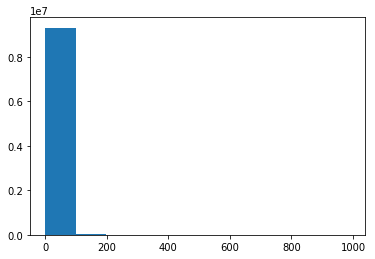

In [241]:
firstMentionSentence = news_train_df['firstMentionSentence']
plt.hist(firstMentionSentence)

(array([3848432.,  665885.,  726184.,  379632.,  211694.,  362375.,
         199206.,  183848.,  200988., 2550506.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

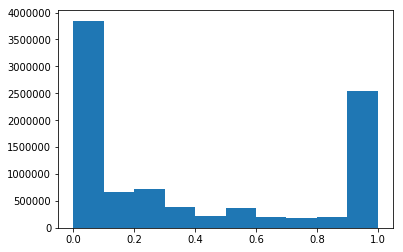

In [243]:
# It's interesting to see the asset are primarily either mentioned at beginning or in the end
firstMentionPosition = news_train_df['firstMentionSentence']/news_train_df['sentenceCount']
plt.hist(firstMentionPosition)

1.0
0.001258400036022067
0.7428698539733887


(array([ 897176.,  749345.,  482295.,  292707.,  268700.,  120518.,
          50052.,  261377.,   32341., 6174239.]),
 array([0.0012584 , 0.10113256, 0.20100673, 0.30088088, 0.40075505,
        0.5006292 , 0.6005034 , 0.7003775 , 0.80025166, 0.90012586,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

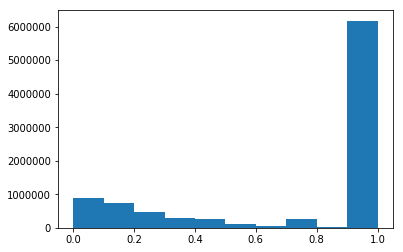

In [244]:
relevance = news_train_df['relevance']
print(max(relevance))
print(min(relevance))
print(np.mean(relevance))
plt.hist(relevance)

2813011 2899088 3616651


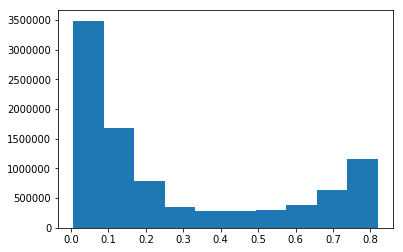

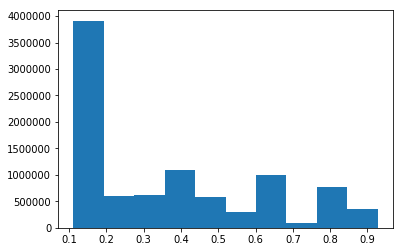

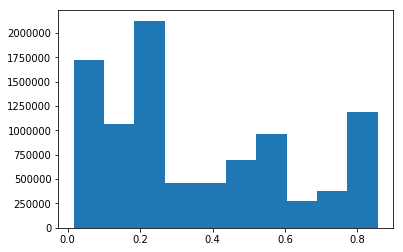

In [250]:
sentimentClass = news_train_df['sentimentClass']
print(sum(sentimentClass==-1),sum(sentimentClass==0),sum(sentimentClass==1))
pNegative = news_train_df['sentimentNegative']
pNeutral = news_train_df['sentimentNeutral']
pPositive = news_train_df['sentimentPositive']
plt.hist(pNegative)
plt.show()
plt.hist(pNeutral)
plt.show()
plt.hist(pPositive)
plt.show()

(array([ 998627.,  823922.,  464037.,  314325.,  282428.,  297551.,
         325312.,  362979.,  481918., 4977651.]),
 array([6.67111408e-04, 1.00600400e-01, 2.00533689e-01, 3.00466978e-01,
        4.00400267e-01, 5.00333556e-01, 6.00266845e-01, 7.00200133e-01,
        8.00133422e-01, 9.00066711e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

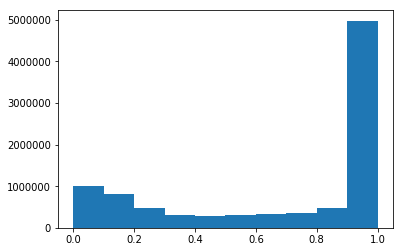

In [251]:
relevantRatio = news_train_df['sentimentWordCount']/news_train_df['wordCount']
plt.hist(relevantRatio)

In [253]:
# The relevance measure is modestly related to relevantRatio
np.corrcoef(relevance,relevantRatio)

array([[1.        , 0.60722612],
       [0.60722612, 1.        ]])

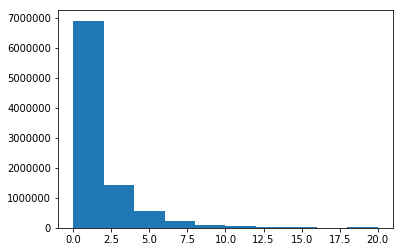

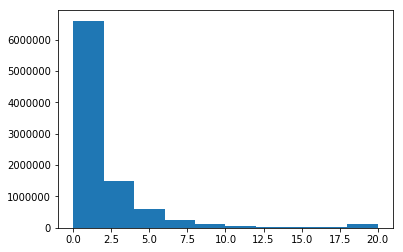

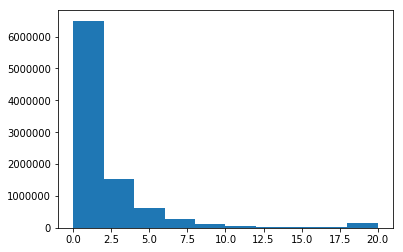

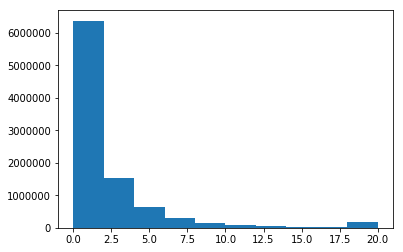

In [260]:
# Novelty data have long tails so clipping is used
# Need to investigate the reasion
# Please refer to Jacob Sisk's papers
plt.hist(np.clip(news_train_df['noveltyCount12H'],0,20))
plt.show()
plt.hist(np.clip(news_train_df['noveltyCount3D'],0,20))
plt.show()
plt.hist(np.clip(news_train_df['noveltyCount5D'],0,20))
plt.show()
plt.hist(np.clip(news_train_df['noveltyCount7D'],0,20))
plt.show()

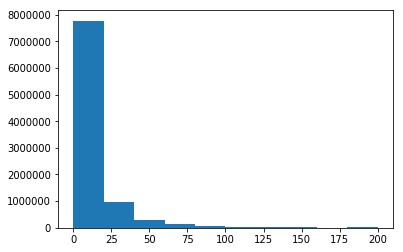

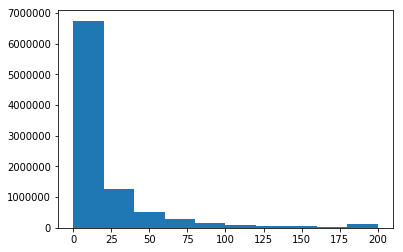

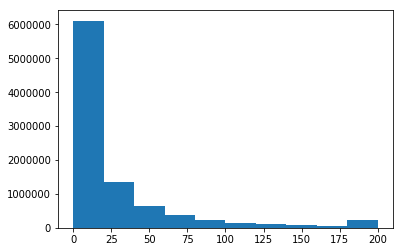

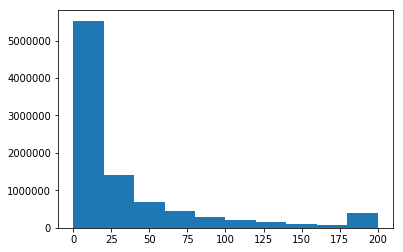

In [269]:
plt.hist(np.clip(news_train_df['volumeCounts24H'],0,200))
plt.show()
plt.hist(np.clip(news_train_df['volumeCounts3D'],0,200))
plt.show()
plt.hist(np.clip(news_train_df['volumeCounts5D'],0,200))
plt.show()
plt.hist(np.clip(news_train_df['volumeCounts7D'],0,200))
plt.show()

# Get prediction

## `get_prediction_days` function

Generator which loops through each "prediction day" (trading day) and provides all market and news observations which occurred since the last data you've received.  Once you call **`predict`** to make your future predictions, you can continue on to the next prediction day.

Yields:
* While there are more prediction day(s) and `predict` was called successfully since the last yield, yields a tuple of:
    * `market_observations_df`: DataFrame with market observations for the next prediction day.
    * `news_observations_df`: DataFrame with news observations for the next prediction day.
    * `predictions_template_df`: DataFrame with `assetCode` and `confidenceValue` columns, prefilled with `confidenceValue = 0`, to be filled in and passed back to the `predict` function.
* If `predict` has not been called since the last yield, yields `None`.

In [ ]:
# You can only iterate through a result from `get_prediction_days()` once
# so be careful not to lose it once you start iterating.
days = env.get_prediction_days()

In [ ]:
(market_obs_df, news_obs_df, predictions_template_df) = next(days)

In [ ]:
market_obs_df.head()

In [ ]:
news_obs_df.head()

In [ ]:
predictions_template_df.head()

Note that we'll get an error if we try to continue on to the next prediction day without making our predictions for the current day.

In [ ]:
next(days)

### **`predict`** function
Stores your predictions for the current prediction day.  Expects the same format as you saw in `predictions_template_df` returned from `get_prediction_days`.

Args:
* `predictions_df`: DataFrame which must have the following columns:
    * `assetCode`: The market asset.
    * `confidenceValue`: Your confidence whether the asset will increase or decrease in 10 trading days.  All values must be in the range `[-1.0, 1.0]`.

The `predictions_df` you send **must** contain the exact set of rows which were given to you in the `predictions_template_df` returned from `get_prediction_days`.  The `predict` function does not validate this, but if you are missing any `assetCode`s or add any extraneous `assetCode`s, then your submission will fail.

Let's make random predictions for the first day:

In [ ]:
import numpy as np
def make_random_predictions(predictions_df):
    predictions_df.confidenceValue = 2.0 * np.random.rand(len(predictions_df)) - 1.0

In [ ]:
make_random_predictions(predictions_template_df)
env.predict(predictions_template_df)

Now we can continue on to the next prediction day and make another round of random predictions for it:

In [ ]:
(market_obs_df, news_obs_df, predictions_template_df) = next(days)

In [ ]:
market_obs_df.head()

In [ ]:
news_obs_df.head()

In [ ]:
predictions_template_df.head()

In [ ]:
make_random_predictions(predictions_template_df)
env.predict(predictions_template_df)

## Main Loop
Let's loop through all the days and make our random predictions.  The `days` generator (returned from `get_prediction_days`) will simply stop returning values once you've reached the end.

In [ ]:
for (market_obs_df, news_obs_df, predictions_template_df) in days:
    make_random_predictions(predictions_template_df)
    env.predict(predictions_template_df)
print('Done!')

## **`write_submission_file`** function

Writes your predictions to a CSV file (`submission.csv`) in the current working directory.

In [ ]:
env.write_submission_file()

In [ ]:
# We've got a submission file!
import os
print([filename for filename in os.listdir('.') if '.csv' in filename])

As indicated by the helper message, calling `write_submission_file` on its own does **not** make a submission to the competition.  It merely tells the module to write the `submission.csv` file as part of the Kernel's output.  To make a submission to the competition, you'll have to **Commit** your Kernel and find the generated `submission.csv` file in that Kernel Version's Output tab (note this is _outside_ of the Kernel Editor), then click "Submit to Competition".  When we re-run your Kernel during Stage Two, we will run the Kernel Version (generated when you hit "Commit") linked to your chosen Submission.

## Restart the Kernel to run your code again
In order to combat cheating, you are only allowed to call `make_env` or iterate through `get_prediction_days` once per Kernel run.  However, while you're iterating on your model it's reasonable to try something out, change the model a bit, and try it again.  Unfortunately, if you try to simply re-run the code, or even refresh the browser page, you'll still be running on the same Kernel execution session you had been running before, and the `twosigmanews` module will still throw errors.  To get around this, you need to explicitly restart your Kernel execution session, which you can do by pressing the Restart button in the Kernel Editor's bottom Console tab:
![Restart button](https://i.imgur.com/hudu8jF.png)